## ........................................Rental property analysis in Germany..............................................
## Task 3 - Geographical Visualization

#### 1.Import Libraries
#### 2.Import Data
#### 3.Data Wrangling
#### 4.Data Cleaning
#### 5.Plotting a choropleth

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import geojson

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 2. Import Data

In [64]:
# Import ".json" file for Germany

hope = r"C:\Users\ponni\Achievement 6\02 Data\Original data\2_hoch.geo.json"

In [65]:
# That's just in case you want to look at the GeoJSON file contents here too:

h = open(r"C:\Users\ponni\Achievement 6\02 Data\Original data\2_hoch.geo.json",)
  
# returns GeoJSON object asa dictionary
data = geojson.load(h)
  
# Iterating through the GeoJSON list
for i in data['features']:
    print(i)

{"geometry": {"coordinates": [[[[9.65046, 49.77634], [9.650968, 49.765152], [9.656839, 49.761452], [9.6404, 49.750141], [9.652028, 49.74276], [9.652208, 49.739029], [9.64654, 49.738991], [9.64672, 49.73526], [9.652379, 49.735302], [9.65255, 49.731571], [9.646889, 49.731529], [9.641079, 49.735222], [9.64141, 49.727749], [9.63018, 49.727669], [9.635949, 49.723991], [9.641581, 49.72403], [9.647408, 49.720341], [9.647579, 49.71661], [9.64192, 49.716572], [9.6421, 49.712841], [9.636459, 49.712799], [9.6315, 49.697842], [9.637129, 49.69788], [9.637469, 49.690422], [9.64878, 49.690502], [9.660488, 49.683109], [9.671889, 49.683182], [9.682979, 49.690701], [9.681969, 49.713058], [9.704829, 49.7132], [9.704669, 49.716919], [9.715789, 49.724449], [9.715949, 49.720722], [9.721829, 49.71703], [9.72246, 49.702122], [9.734221, 49.694759], [9.734711, 49.683601], [9.740411, 49.683632], [9.757231, 49.6912], [9.756611, 49.7061], [9.77344, 49.713661], [9.784719, 49.717472], [9.790429, 49.71751], [9.795988

In [5]:
# Defining path
path=r'C:\Users\ponni\Achievement 6'

In [6]:
# Import original data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'immodata_new7.csv'), index_col = False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209079 entries, 0 to 209078
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        209079 non-null  int64  
 1   State             209079 non-null  object 
 2   City              209079 non-null  object 
 3   Pincode           209079 non-null  int64  
 4   Year_constructed  209079 non-null  int64  
 5   Rent              209079 non-null  float64
 6   Base_rent         209079 non-null  float64
 7   Maintenance_fee   209079 non-null  float64
 8   Area(m2)          209079 non-null  float64
 9   Rooms             209079 non-null  int64  
 10  Heating_type      209079 non-null  object 
 11  House_condition   209079 non-null  object 
 12  TV_offer          209079 non-null  object 
 13  Newly_built       209079 non-null  bool   
 14  Balcony           209079 non-null  bool   
 15  Picture_count     209079 non-null  int64  
 16  Price_trend       20

In [8]:
#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
#Removing unnecessary column
df.drop('Floor', axis=1, inplace=True)

In [11]:
df=df[df['Rent']<=3000]

# 3. Consistency checks

In [15]:
# Check for missing values

df.isnull().sum() # No missing values!

State               0
City                0
Pincode             0
Year_constructed    0
Rent                0
Base_rent           0
Maintenance_fee     0
Area(m2)            0
Rooms               0
Heating_type        0
House_condition     0
TV_offer            0
Newly_built         0
Balcony             0
Picture_count       0
Price_trend         0
Kitchen             0
Cellar              0
Lift                0
Flat_type           0
Garden              0
Price_per_m2        0
Rent_range          0
dtype: int64

In [16]:
# check for duplicates

dups = df.duplicated()

In [17]:
dups.shape # No duplicates!

(207261,)

<AxesSubplot: xlabel='Rent', ylabel='Count'>

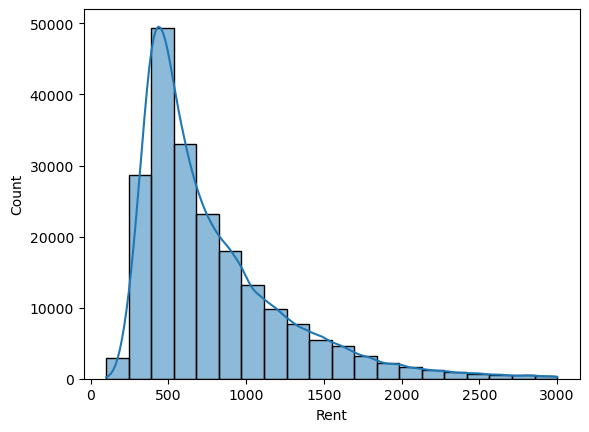

In [20]:
# Extreme values check

sns.histplot(df['Rent'], bins=20, kde = True)

<AxesSubplot: xlabel='Year_constructed', ylabel='Count'>

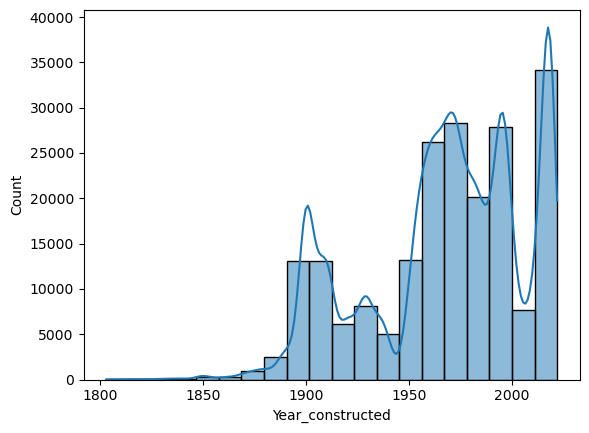

In [32]:
# Extreme values check

sns.histplot(df['Year_constructed'], bins=20, kde = True)

In [33]:
# Check how many extreme values

df[df['Year_constructed'] <1850]

,State,City,Pincode,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Heating_type,...,Balcony,Picture_count,Price_trend,Kitchen,Cellar,Lift,Flat_type,Garden,Price_per_m2,Rent_range
2851,Niedersachsen,Wesermarsch_Kreis,26931,1849,330.00,250.00,80.0,21.00,1,central_heating,...,False,8,3.92,False,False,False,apartment,False,11.904762,low rent
3765,Bayern,Ingolstadt,85049,1818,982.00,832.00,150.0,64.00,2,floor_heating,...,False,11,0.91,True,True,False,other,False,13.000000,low rent
5467,Rheinland_Pfalz,Bad_Kreuznach_Kreis,55543,1830,1230.00,1050.00,180.0,86.83,3,self_contained_central_heating,...,True,2,5.08,False,False,False,apartment,False,12.092595,low rent
5814,Sachsen_Anhalt,Magdeburg,39104,1828,1307.00,914.00,393.0,131.00,4,central_heating,...,True,11,1.74,True,True,True,other,False,6.977099,low rent
8202,Brandenburg,Elbe_Elster_Kreis,4924,1820,711.37,621.37,90.0,84.54,2,Other,...,False,5,3.55,False,False,True,apartment,False,7.350012,low rent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202174,Bayern,Berchtesgadener_Land_Kreis,83410,1820,610.00,455.00,155.0,61.00,2,heat_pump,...,True,16,2.74,True,False,True,apartment,True,7.459016,low rent
202468,Mecklenburg_Vorpommern,Schwerin,19053,1828,719.00,549.00,170.0,78.41,2,district_heating,...,False,16,4.48,False,True,True,roof_storey,True,7.001658,low rent
202484,Brandenburg,Potsdam,14467,1840,1473.89,1291.89,182.0,142.75,4,self_contained_central_heating,...,True,11,6.49,False,True,False,apartment,False,9.050018,low rent
204417,Sachsen_Anhalt,Harz_Kreis,38871,1828,630.00,520.00,110.0,86.21,2,self_contained_central_heating,...,True,2,0.98,False,True,False,other,False,6.031783,low rent


In [34]:
df.dtypes

State                object
City                 object
Pincode               int64
Year_constructed      int64
Rent                float64
Base_rent           float64
Maintenance_fee     float64
Area(m2)            float64
Rooms                 int64
Heating_type         object
House_condition      object
TV_offer             object
Newly_built            bool
Balcony                bool
Picture_count         int64
Price_trend         float64
Kitchen                bool
Cellar                 bool
Lift                   bool
Flat_type            object
Garden                 bool
Price_per_m2        float64
Rent_range           object
dtype: object

# 4. Plotting a choropleth

In [66]:
# Create a data frame with just the cities and the rental values we want plotted

data_to_plot = df[['State','Rent']]
data_to_plot.head()

,State,Rent
0,Nordrhein_Westfalen,840.00
1,Rheinland_Pfalz,934.00
2,Sachsen,1220.00
3,Sachsen,401.15
4,Bremen,903.00


In [67]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and geojson geometries. This allows us to quickly visualize data combinations

folium.Choropleth(
    geo_data = hope, 
    data = data_to_plot,
    columns = ['State','Rent'],
    key_on = 'properties.name', # this part is very important - check your geojson file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Rent").add_to(map)
folium.LayerControl().add_to(map)

map

In [37]:
map.save

'C:\\Users\\ponni\\Achievement 6\\02 Data\\Original data\\germany .geojson'